# Tree models apart from XGBoost as well as some other model experiments

In [2]:
KAGGLE=False # set to True if using the Kaggle version of the dataset
WRITE=False

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import sklearn.preprocessing

from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, StratifiedKFold,KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import catboost as cb

from xgboost import XGBRegressor
import pickle

import shap
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_columns', 300)

In [4]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

The data has been pre-processed

In [5]:
# def load_data(tree=None):
#     if KAGGLE:
#         train = pd.read_csv('data/train.csv')
#         test = pd.read_csv('data/test.csv')
#         num_train=np.shape(train)[0]
#         num_test=np.shape(test)[0]
#         alldata=train.append(test, ignore_index=True)
#     else:
#         alldata=pd.read_csv('./data/Ames_HousePriceLocsDistNoDpl.csv')#, index_col=0) #already cleaned (see work in appendix files)

#         #alldata=pd.read_csv('./data/Ames_HousePriceLocs.csv')#, index_col=0) #already cleaned (see work in appendix files)
#     return alldata

# alldata=load_data()

In [6]:

alldata=pd.read_csv('./data/Ames_HousePriceLocsDistNoDpl.csv')#, index_col=0) #already cleaned (see work in appendix files)


If working with the Kaggle version of the dataset, can use the function below to do train-test split

In [7]:
def label_encode():
    from sklearn import preprocessing
    le = preprocessing.LabelEncoder()
    for column_name in alldata.columns:
        if alldata[column_name].dtype == object:
            #cat_idxs.append(alldata.columns.get_loc(column_name))
            #alldata[column_name] = alldata[column_name].astype(str)
            alldata[column_name] = le.fit_transform(alldata[column_name])
label_encode()

In [8]:
# def split_into_train_test(alldata):
#     y=alldata['SalePrice']
#     X=alldata.drop(['SalePrice'],axis=1)
#     if KAGGLE:
#         return split_train_test(alldata=alldata,num_train=num_train)
#     else:
#         return train_test_split(X, y, test_size=0.2, random_state=42)
# X_train, X_test, y_train, y_test = split_into_train_test(alldata)  

In [9]:
def train_test_split_custom(data=alldata,cols=[]):
    y=data['SalePrice']
    X=data.drop(['SalePrice'],axis=1)
    X= X if not cols else X[cols]
    return train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split_custom()  

# Catboost

In [ ]:
train_dataset = cb.Pool(X_train, y_train) 
test_dataset = cb.Pool(X_test, y_test)




It would have been desirable to let CatBoost choose how to encode the catecorical columns
Due to TypeError: Cannot convert 'b'RM'' to float
I chose to LabelEncode beforehand. Otherwise, the code below would work.

In [ ]:
# train_dataset = cb.Pool(X_train, y_train,cat_features=cat_idxs) 
# test_dataset = cb.Pool(X_test, y_test,cat_features=cat_idxs)

In [ ]:
model_cb = cb.CatBoostRegressor(loss_function='RMSE',verbose=False)

In [ ]:
grid = {'iterations': [100, 150, 200],
        'learning_rate': [0.03, 0.1],
        'depth': [2, 4, 6, 8, 10],
        'l2_leaf_reg': [0.2, 0.5, 1, 3]}
model_cb.grid_search(grid, train_dataset,verbose=False)


bestTest = 32730.29419
bestIteration = 99


bestTest = 31820.32972
bestIteration = 42


bestTest = 32744.0975
bestIteration = 99


bestTest = 32602.69999
bestIteration = 62


bestTest = 32908.54767
bestIteration = 99


bestTest = 32039.12057
bestIteration = 48


bestTest = 32871.06236
bestIteration = 99


bestTest = 31542.22047
bestIteration = 54


bestTest = 30809.75013
bestIteration = 140


bestTest = 31820.32972
bestIteration = 42


bestTest = 30871.27863
bestIteration = 139


bestTest = 32602.69999
bestIteration = 62


bestTest = 30776.33647
bestIteration = 140


bestTest = 32039.12057
bestIteration = 48


bestTest = 30629.62392
bestIteration = 142


bestTest = 31542.22047
bestIteration = 54


bestTest = 30809.75013
bestIteration = 140


bestTest = 31820.32972
bestIteration = 42


bestTest = 30871.27863
bestIteration = 139


bestTest = 32602.69999
bestIteration = 62


bestTest = 30776.33647
bestIteration = 140


bestTest = 32039.12057
bestIteration = 48


bestTest = 30629.62392
be

{'params': {'depth': 10,
  'l2_leaf_reg': 3,
  'iterations': 200,
  'learning_rate': 0.1},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45

In [ ]:
from sklearn.metrics import r2_score

pred = model_cb.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, pred)))
r2 = r2_score(y_test, pred)
print('Testing performance')
print('RMSE: {:.5f}'.format(rmse))
print('R2: {:.5f}'.format(r2))

#With lats/longs data, R2 went up from .93 to .95!!!

Testing performance
RMSE: 21380.97680
R2: 0.92275


In [ ]:
sorted_feature_importance = model_cb.feature_importances_.argsort()

Text(0.5, 0, 'CatBoost Feature Importance')

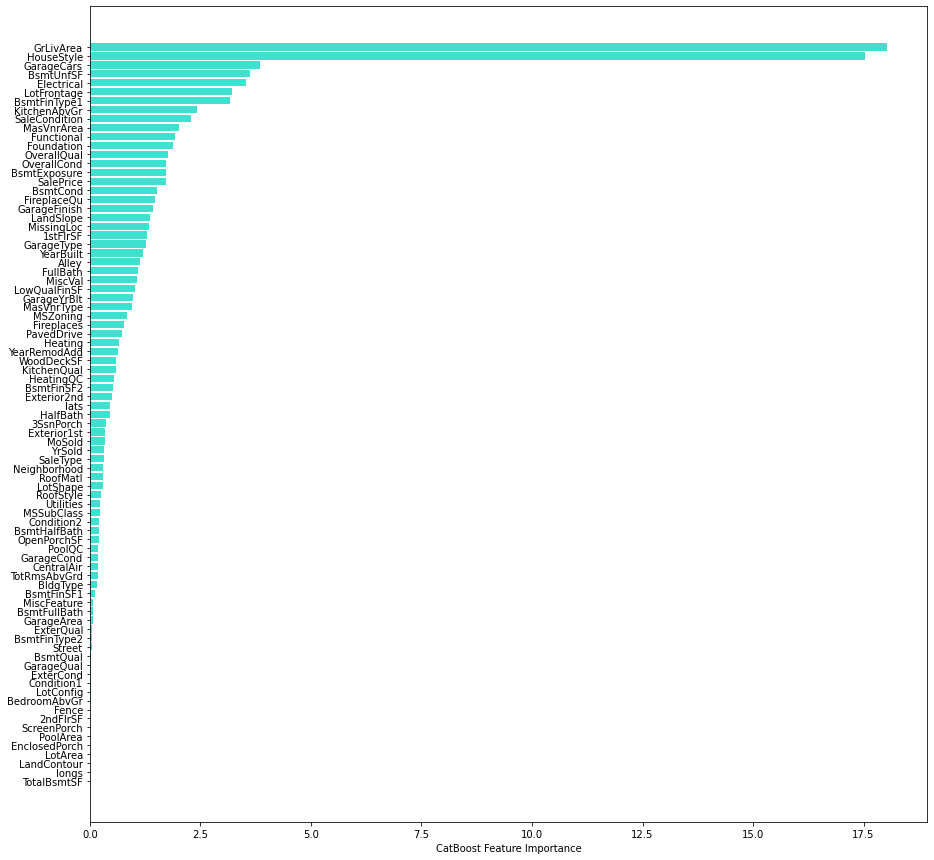

In [ ]:
plt.rcParams["figure.figsize"] = (15, 15)

plt.barh(alldata.columns[sorted_feature_importance], 
        model_cb.feature_importances_[sorted_feature_importance], 
        color='turquoise')
plt.xlabel("CatBoost Feature Importance")

In [ ]:
importances = {}
importances['y'] = pd.Series(model_cb.feature_importances_, index=X_train.columns).sort_values(ascending=False)
importances['y']

GrLivArea        18.032391
OverallQual      17.527542
GarageArea        3.838099
TotalBsmtSF       3.618806
1stFlrSF          3.524429
LotArea           3.206217
BsmtFinSF1        3.165897
KitchenQual       2.417474
lats              2.296543
ExterQual         2.022323
Fireplaces        1.934991
BsmtQual          1.873055
OverallCond       1.759548
YearBuilt         1.723654
BsmtFinType1      1.713439
MSSubClass        1.710691
BsmtExposure      1.518544
GarageType        1.479069
GarageCars        1.426359
Neighborhood      1.355448
distToUI          1.328876
2ndFlrSF          1.281771
GarageYrBlt       1.277074
YearRemodAdd      1.192133
LotShape          1.133216
HalfBath          1.077487
MoSold            1.058839
BsmtFullBath      1.017928
GarageFinish      0.979061
MasVnrArea        0.959242
LotFrontage       0.839934
FireplaceQu       0.769918
WoodDeckSF        0.714193
HeatingQC         0.651914
RoofStyle         0.625016
OpenPorchSF       0.593928
TotRmsAbvGrd      0.582528
C

In [ ]:
import shap

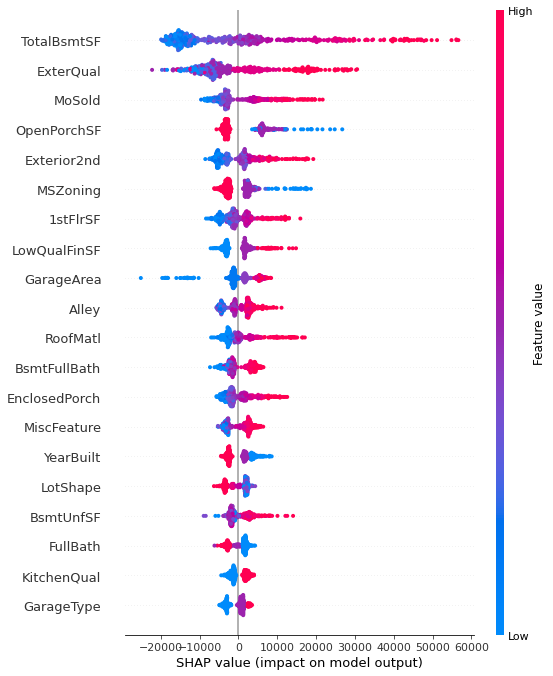

In [ ]:
explainer = shap.TreeExplainer(model_cb)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, feature_names = alldata.columns[sorted_feature_importance])

In [ ]:
#shap.plots.waterfall??

In [ ]:
# explainer = shap.Explainer(model_cb, X_test)
# shap_values = explainer(X_test)
# shap.plots.waterfall(shap_values[0])

In [ ]:
#catboost has a custom function for saving models: pickle.dump will create problems while blending
model_cb.save_model('./models/model_cb_locs_dist_nodpl') 

# Random Forests

### First fit the 'full' version, which overfits 

In [11]:
def run_model(model,X_train,y_train,X_test,y_test):
    
    # Fit Model
    model.fit(X_train,y_train)
    
    # Get Metrics
    
    preds = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test,preds))
    print(f'RMSE : {rmse}')
    r2 = r2_score(y_test, preds)
    print(f'R^2 : {r2}')

    return model

In [12]:
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor()
run_model(model_rf,X_train,y_train,X_test,y_test)

RMSE : 23587.581310327
R^2 : 0.9059856253729976


RandomForestRegressor()

In [13]:
if WRITE:
    pickle.dump(model_rf, open('./models/model_rf_locs_dist_nodpl', 'wb'))


In [14]:
importances = {}
importances['y'] = pd.Series(model_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
importances['y']

OverallQual      0.553853
GrLivArea        0.147620
1stFlrSF         0.047764
TotalBsmtSF      0.032681
BsmtFinSF1       0.026715
GarageArea       0.016305
2ndFlrSF         0.013819
LotArea          0.012444
FullBath         0.012424
YearBuilt        0.010327
GarageCars       0.007328
YearRemodAdd     0.006556
MasVnrArea       0.006421
LotFrontage      0.005719
lats             0.005456
GarageFinish     0.005101
KitchenQual      0.005025
OpenPorchSF      0.004716
WoodDeckSF       0.004559
longs            0.004332
BsmtUnfSF        0.004227
distToUI         0.004001
OverallCond      0.003968
Neighborhood     0.003869
Fireplaces       0.003632
BsmtQual         0.003246
GarageType       0.003133
GarageYrBlt      0.003070
MSZoning         0.002978
MoSold           0.002925
ExterQual        0.002879
BsmtFullBath     0.002765
BsmtFinType1     0.002430
ScreenPorch      0.002339
TotRmsAbvGrd     0.001965
FireplaceQu      0.001718
MSSubClass       0.001310
CentralAir       0.001216
YrSold      

## Now recursively select features to build a more generalizable model that suffers less from overfitting

In [20]:
rfe = RFE(estimator=RandomForestRegressor(min_samples_leaf=10),
n_features_to_select=20,step=10,verbose=1)
rfe.fit(X_train,y_train)

Fitting estimator with 83 features.
Fitting estimator with 73 features.
Fitting estimator with 63 features.
Fitting estimator with 53 features.
Fitting estimator with 43 features.
Fitting estimator with 33 features.
Fitting estimator with 23 features.


RFE(estimator=RandomForestRegressor(min_samples_leaf=10),
    n_features_to_select=20, step=10, verbose=1)

In [21]:
rfe.score(X_test,y_test)

0.8896814437887424

- Notice that R^2 is .8925 vs. .9067 for the 'full' model.  Thus the R^2 are similar, yet the model with only 20 features and a minimum of at least 10 observations in each node 
- Does it overfit?

In [22]:
rfe.score(X_train,y_train)

0.918301601275614

In [23]:
cols_selected_=list(X_train.columns[rfe.support_])

In [24]:
y=alldata['SalePrice']
X=alldata.drop(['SalePrice'],axis=1)
X_rf=X[cols_selected_]
X_train, X_test, y_train, y_test =  train_test_split(X_rf, y, test_size=0.2, random_state=42)

In [25]:
rf=rfe.estimator.fit(X_train,y_train)
rf.score(X_test,y_test)

0.8924063362524679

- Can train an RF on 20 most important features with little overfitting (under 3% train-test difference)

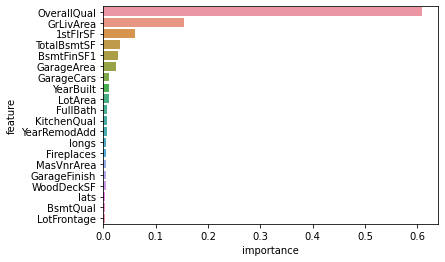

In [26]:
feature_importances = pd.DataFrame({'feature':list(X_test.columns),
                                    'importance':rf.feature_importances_}).sort_values('importance', ascending=False)
sns.barplot(data=feature_importances,x='importance',y='feature')
plt.show()

# Compare a few different models below to get an idea of relative performance

## np.sqrt(mean_squared_error(y_test,rf_preds))

In [ ]:
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
run_model(model_lr,X_train,y_train,X_test,y_test)

RMSE : 25385.31006861012
R^2 : 0.9005161258306823


LinearRegression()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor()
run_model(model_rf,X_train,y_train,X_test,y_test)

RMSE : 25144.762988612016
R^2 : 0.9023925791293337


RandomForestRegressor()

In [ ]:
importances = {}
importances['y'] = pd.Series(model_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
importances['y']

OverallQual      5.815197e-01
1stFlrSF         5.826681e-02
FullBath         4.307005e-02
GarageArea       3.900812e-02
2ndFlrSF         3.135091e-02
TotalBsmtSF      3.122583e-02
BsmtFinSF1       2.986800e-02
LotArea          2.209708e-02
GarageCars       1.344276e-02
Fireplaces       1.027501e-02
lats             9.364675e-03
MasVnrArea       7.342814e-03
LotFrontage      7.166977e-03
KitchenQual      6.982249e-03
TotRmsAbvGrd     6.667535e-03
BsmtQual         6.324967e-03
YearBuilt        6.177922e-03
YearRemodAdd     6.138475e-03
longs            5.294645e-03
Neighborhood     5.201677e-03
WoodDeckSF       5.169345e-03
OpenPorchSF      4.986943e-03
BsmtUnfSF        4.616367e-03
MoSold           4.047977e-03
OverallCond      3.496752e-03
GarageYrBlt      3.405651e-03
GarageType       2.976310e-03
FireplaceQu      2.478084e-03
ExterQual        2.418700e-03
BedroomAbvGr     2.349930e-03
MSSubClass       2.022964e-03
BsmtFullBath     1.953859e-03
BsmtFinType1     1.784642e-03
Exterior1s

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor

model_gb = GradientBoostingRegressor()
run_model(model_gb,X_train,y_train,X_test,y_test)

RMSE : 21649.56045272719
R^2 : 0.9276421071228171


GradientBoostingRegressor()

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
model_ab = AdaBoostRegressor()
run_model(model_ab,X_train,y_train,X_test,y_test)

RMSE : 34856.118423080276
R^2 : 0.8124375964332984


AdaBoostRegressor()

In [ ]:
from sklearn.preprocessing import RobustScaler
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.01,0.1,1,5,10,100,1000],'gamma':['auto','scale']}  #Are gammas for variance?
svr = SVR()
grid = GridSearchCV(svr,param_grid)
run_model(grid,X_train,y_train,X_test,y_test)



RMSE : 80957.62904185217


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

std_scale = StandardScaler()
s = std_scale.fit_transform(X_train)
pca = PCA(n_components=30)

pca.fit(X_train)
pc = pca.transform(s)
model_kmeans = KMeans(n_clusters=5)

run_model(model_kmeans,X_train,y_train,X_test,y_test)


RMSE : 199030.80108212752


/usr/local/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
k_values = [1,5,10,50]

for n in k_values:
    model = KNeighborsRegressor(n_neighbors=n)
    run_model(model,X_train,y_train,X_test,y_test)

RMSE : 45896.06127854242
RMSE : 44574.96970627604
RMSE : 48929.23713010485
RMSE : 57164.68533098934


In [ ]:
# from sklearn.pipeline import make_pipeline 
# from sklearn.preprocessing import PolynomialFeatures, StandardScaler
# pipe = make_pipeline(OneHotEncoder(),StandardScaler(),PolynomialFeatures(3),LinearRegression())
# run_model(pipe,X_train,y_train,X_test,y_test)